In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy.optimize import curve_fit

In [24]:
data = pd.read_csv("listaprocessadores.csv", sep="\t")
data["N_de_transistores_log"] = data["Numero_de_Transistores"].apply(np.log)

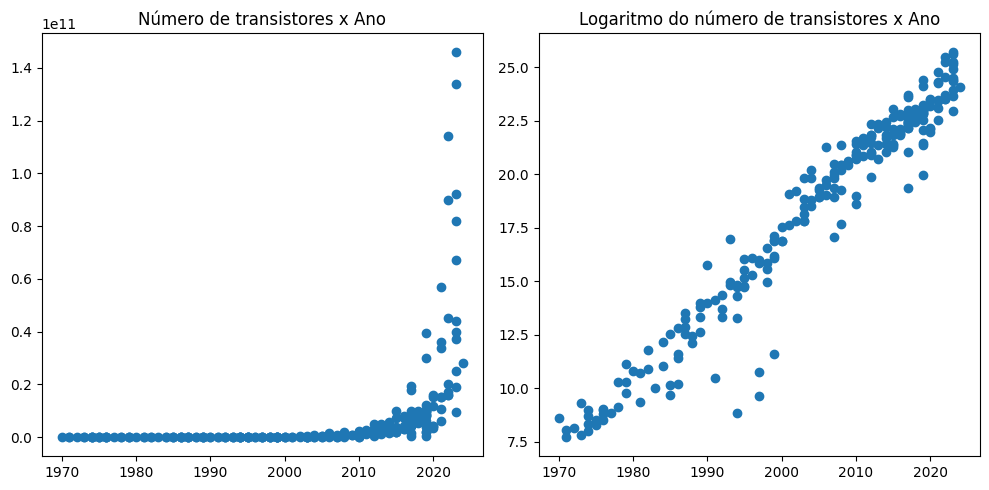

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(data["Ano"], data["Numero_de_Transistores"])
ax[0].set_title("Número de transistores x Ano")

ax[1].scatter(data["Ano"], data["N_de_transistores_log"])
ax[1].set_title("Logaritmo do número de transistores x Ano")
fig.tight_layout()
plt.show()

In [26]:
x_scaled = data["Ano"].index.values
y = data["Numero_de_Transistores"].values

Os coeficientes são: [0.06677708 9.19654178]


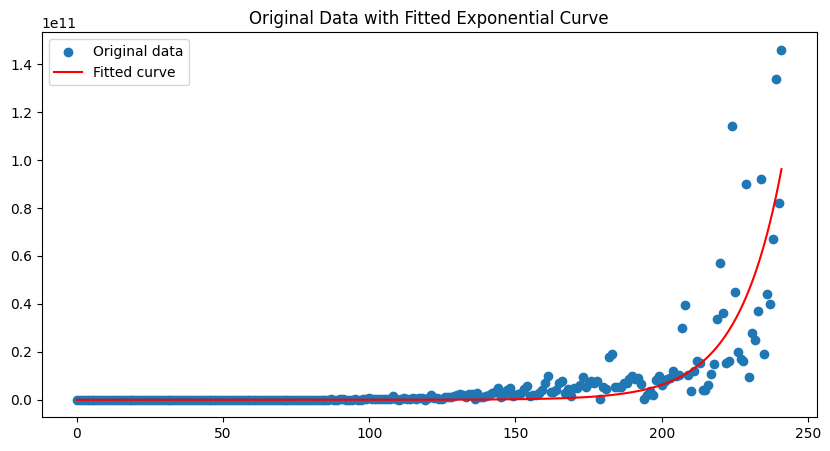

In [27]:
# Define the function to fit the exponential curve
def myfunc(x, a, b):
    return np.exp(a * x + b)


# Perform the curve fit with increased maxfev
popt, pcov = curve_fit(myfunc, x_scaled, y, maxfev=5000)
print(f"Os coeficientes são: {popt}")


# Plot the original data and the fitted curve
fig, ax = plt.subplots(figsize=(10, 5))

# First subplot with the original data and fitted curve
ax.scatter(x_scaled, y, label="Original data")
ax.plot(x_scaled, myfunc(x_scaled, *popt), "r", label="Fitted curve")
ax.set_title("Original Data with Fitted Exponential Curve")
ax.legend()


plt.show()

Os coeficientes são: [9.9906593]


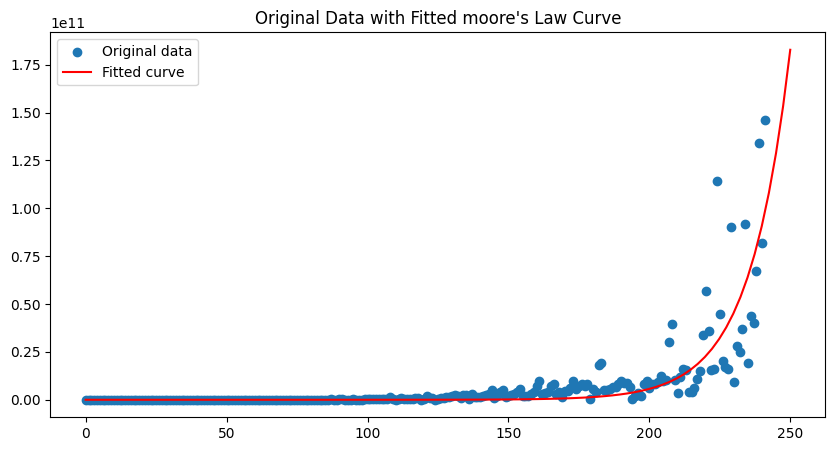

In [28]:
# Define the function to fit the exponential curve
def lei_de_moore(t, T=2):
    return 5360.0 * 2 ** (t / T)


# Perform the curve fit
popt, pcov = curve_fit(lei_de_moore, x_scaled, y)
print(f"Os coeficientes são: {popt}")

x_plot = np.linspace(0, 250, 100)


# Plot the original data and the fitted curve
fig, ax = plt.subplots(figsize=(10, 5))

# First subplot with the original data and fitted curve
ax.scatter(x_scaled, y, label="Original data")
ax.plot(x_plot, lei_de_moore(x_plot, *popt), "r", label="Fitted curve")
ax.set_title("Original Data with Fitted moore's Law Curve")
ax.legend()


plt.show()